# BBC News TL;DR Generator
## Simple Text Summarizer
-------------------------


This **'Too Long; Didn't Read'** generator creates simple, extraction-based summary bullets from random BBC tech-related news stories (full dataset is available at http://mlg.ucd.ie/datasets/bbc.html).

Program is using a cosine similarity to compare the sentences and rank them accordingly using PageRank algorithm. Top ranked sentences are presented as a summary.

Cosine similarity is a metric that measures the cosine of an angle between two vectors projected in multi-dimensional space. The smaller the angle between the vectors, the more similar they are to each other (check out https://youtu.be/m_CooIRM3UI for more details).

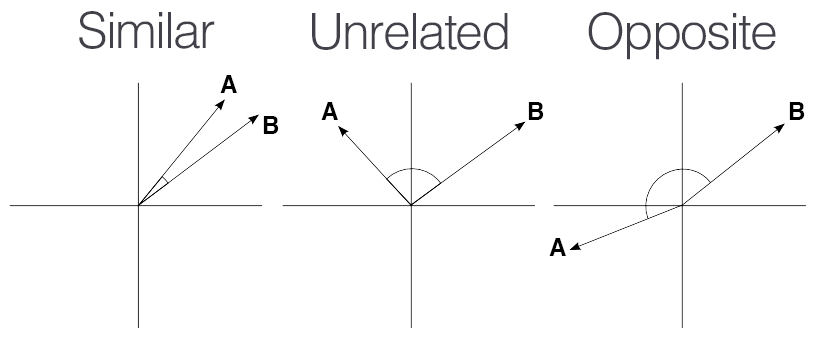

## Importing neccesary modules

In [1]:
import random
import os
import nltk
from nltk.corpus import stopwords # used to remove common, mostly unnecessary words like articles, prepositions or pronouns
# if failed try:
# nltk.download('stopwords') 
from nltk.cluster.util import cosine_distance # cos_similarity = 1 - cos_distance
import numpy as np
import networkx as nx # rank the sentences using network graph(pagerank function)

## Defining functions

In [2]:
# picking a random article
def choose_file(path):
    file_name = random.choice(os.listdir(path))
    return path + '/' + file_name

In [3]:
# opening a file, cleaning the text and tokenizing the sentences
def read_article(file_name):
    file_listed = open(file_name).readlines() 
    
    file_string = '' # whole file as one long string
    for line in file_listed[1:]:
        line = line.rstrip().replace(',', '').replace('"', '').replace(':', '').replace('?', '.').replace('!', '.')
        if len(line) > 1:
            file_string += line + ' '
            
    article = file_string.split('. ') # list of sentences
    
    sentences = [] # list of lists (words in sentences)
    for sentence in article:
        sentences.append(sentence.split(' '))
        
    return file_listed, sentences

In [4]:
# turning two sentences into word-frequency vectors and calculating cosine similarity between them
def sentence_similarity(sentence_1, sentence_2, stopwords = None):
    if stopwords is None:
        stopwords = []
        
    sentence_1 = [word.lower() for word in sentence_1]
    sentence_2 = [word.lower() for word in sentence_2]
    all_words = list(set(sentence_1 + sentence_2))
    
    vector_1 = [0 for i in range(len(all_words))]
    vector_2 = [0 for i in range(len(all_words))]
    
    for word in sentence_1:
        if word in stopwords:
            continue
        vector_1[all_words.index(word)] += 1
        
    for word in sentence_2:
        if word in stopwords:
            continue
        vector_2[all_words.index(word)] += 1
        
    return 1 - cosine_distance(vector_1, vector_2)

In [5]:
# creating similarity matrix filled with results of cosine similarity calculations
def generate_similarity_matrix(sentences, stop_words):
    similarity_matrix = np.zeros((len(sentences), len(sentences)))
    
    for idx_1 in range(len(sentences)):
        for idx_2 in range(len(sentences)):
            if idx_1 == idx_2:
                continue
            similarity_matrix[idx_1][idx_2] = sentence_similarity(sentences[idx_1], sentences[idx_2], stop_words)
            
    return similarity_matrix

In [6]:
# main function - rank the vectors and print the summary
def generate_summary(path, top_n = 4): # show top_n sentences
    stop_words = stopwords.words('english') 
    file_listed, sentences = read_article(choose_file(path))
    
    sentence_similarity_matrix = generate_similarity_matrix(sentences, stop_words)
    sentence_similarity_graph = nx.from_numpy_array(sentence_similarity_matrix) # returns a graph from a 2D NumPy array
    scores = nx.pagerank(sentence_similarity_graph) # pagerank computes a ranking of the nodes in the graph 
    ranked_sentence = sorted(((scores[i], s) for i, s in enumerate(sentences)), reverse = True)

    print('Title:', file_listed[0])
    
    print('Full article:')
    full_counter = 0
    for line in file_listed[1:]:
        print(line.strip())
        full_counter += len(line)
    print('\nSum of characters:', full_counter)
    
    print('\nTL;DR:') 
    summary_counter = 0
    for i in range(top_n):
        sentence = ' '.join(ranked_sentence[i][1])
        print('-', sentence, end = '.\n')
        summary_counter += len(sentence)
    print('\nSum of characters:', summary_counter)

## Program execution

In [7]:
generate_summary('BBC Dataset - Tech')

Title: Mobile games come of age

Full article:

The BBC News website takes a look at how games on mobile phones are maturing. A brief round-up follows but you can skip straight to the reviews by clicking on the links below.

If you think of Snake when some mentions "mobile games" then you could be in for a bit of a surprise. This is because mobile games have come a long way in a very short time. Even before Nokia's N-Gage game phone launched in late 2003, many mobile operators were realising that there was an audience looking for something to play on their handset.

And given that many more people own handsets than own portable game playing gadgets such as the GameBoy it could be a very lucrative market. That audience includes commuters wanting something to fill their time on the way home, game fans looking for a bit of variety and hard core gamers who like to play every moment they can. Life for all these types of player has got immeasurably better in the last year as the numbers of t